#手順
1. データの読み込み
2. データの前処理（標準化、one-hot表現）
3. 学習とテスト（検証）サンプルに分ける
4. モデル作成(Sequential)
5. 学習
6. グラフで誤差と精度確認
7. テストデータでの誤差と精度確認

In [ ]:
#基本ライブラリ
#import numpy as np
#import matplotlib.pyplot as plt

#機械学習関連のライブラリ
#from sklearn import datasets
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split

#深層学習関連のライブラリ
#from keras.utils import np_utils
#from keras.models import Sequential
#from keras.layers import Dense, Activation

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])  # データを10個表示
print(iris.target[:10])  # ラベルを10個表示
print(iris.data.shape)  # データの形状を表示

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [ ]:
iris

In [ ]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()  # 標準化のためのスケーラー
scaler.fit(iris.data)  # パラメータの計算
x = scaler.transform(iris.data)  # データの変換
print(x[:10])

t = np_utils.to_categorical(iris.target)  # ラベルをone-hot表現に変換
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
Googleryuuu17


ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

# x_train: 訓練用の入力データ
# x_test: テスト用の入力データ
# t_train: 訓練用の正解データ
# t_test: テスト用の正解データ
# train_size=0.75: 75%が訓練用、25%がテスト用
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4)) # 4つの特徴が入力なので、入力層のニューロン数は4、中間層のニューロン数は32
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
model.add(Dense(32)) # ニューロン数32の全結合層を追加
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
model.add(Dense(3)) # 3つに分類するので、出力層のニューロン数は3
model.add(Activation('softmax')) # 3つ以上の分類にはソフトマックス関数を使用
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) # モデルのコンパイル

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
______________________________________________________

In [ ]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 15s 2ms/step - loss: 1.1557 - accuracy: 0.3279
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9615 - accuracy: 0.5304
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8778 - accuracy: 0.7711
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7801 - accuracy: 0.8264
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7520 - accuracy: 0.7486
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.8531
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.8581
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.9190
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.8341
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.8416
Epoch 11/30
14/14 

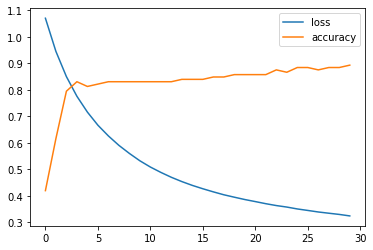

In [ ]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.2938 - accuracy: 0.8158
0.2937575578689575 0.8157894611358643


In [ ]:
model.predict(x_test)

array([[3.85473408e-02, 4.92193550e-01, 4.69259202e-01],
       [2.42642630e-02, 3.51505160e-01, 6.24230623e-01],
       [2.58495100e-02, 2.73300916e-01, 7.00849593e-01],
       [2.17483509e-02, 2.08046168e-01, 7.70205438e-01],
       [9.72038448e-01, 2.64452156e-02, 1.51639595e-03],
       [9.81131792e-01, 1.79964416e-02, 8.71821016e-04],
       [9.79638577e-01, 1.73043590e-02, 3.05699720e-03],
       [9.57630217e-01, 3.37954313e-02, 8.57430696e-03],
       [2.72107981e-02, 3.14806670e-01, 6.57982528e-01],
       [8.06007087e-02, 8.74596298e-01, 4.48030494e-02],
       [6.56646341e-02, 7.67735839e-01, 1.66599467e-01],
       [9.82287228e-01, 1.38943382e-02, 3.81841674e-03],
       [5.67194596e-02, 4.74032938e-01, 4.69247669e-01],
       [9.87667859e-01, 1.04940403e-02, 1.83808093e-03],
       [9.73847330e-01, 2.04989072e-02, 5.65378880e-03],
       [2.33096499e-02, 6.52096629e-01, 3.24593723e-01],
       [1.62499323e-02, 1.97313607e-01, 7.86436498e-01],
       [9.76159155e-01, 1.96395

In [ ]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')

# test2

In [ ]:
# 1. データ読み込みと確認
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [ ]:
# 2. データの前処理
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

t = np_utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
# 3. 訓練と検証用データの作成
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [ ]:
# 4. モデルの作成
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(3))
model.add(Activation("softmax"))
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics="accuracy")

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_9 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_10 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
_________________________________________________________________
activation_11 (Activation)   (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

In [ ]:
# 5. 学習
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 14s 2ms/step - loss: 0.9700 - accuracy: 0.5433
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8872 - accuracy: 0.6710
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8277 - accuracy: 0.6996
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7267 - accuracy: 0.7507
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7343 - accuracy: 0.7062
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.7413
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.7671
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.8457
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.7806
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.8256
Epoch 11/30
14/14 

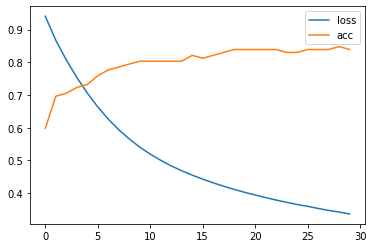

In [ ]:
# 6. 学習ログ確認
import matplotlib.pyplot as plt

hist_loss = history.history["loss"]
hist_acc = history.history["accuracy"]


plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='acc')
plt.legend()
plt.show()

In [ ]:
# 7. 検証データにて確認
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.3193 - accuracy: 0.9211
0.3192982077598572 0.9210526347160339


# in the case of Adams

In [ ]:
model2 = Sequential()
model2.add(Dense(32, input_dim=4))
model2.add(Activation("relu"))
model2.add(Dense(32))
model2.add(Activation("relu"))
model2.add(Dense(3))
model2.add(Activation("softmax"))
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print(model2.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_15 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_16 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 99        
_________________________________________________________________
activation_17 (Activation)   (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

In [ ]:
history2 = model2.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.0517 - accuracy: 0.5529
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8952 - accuracy: 0.7802
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7588 - accuracy: 0.7662
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.7990
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.8233
Epoch 6/30
14/14 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7944
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7935
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8633
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8704
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.9198
Epoch 11/30
14/14 [

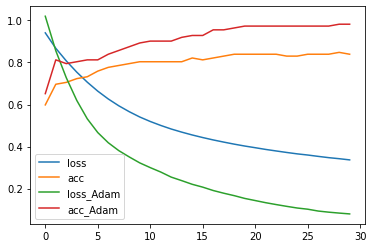

In [ ]:
hist_loss2 = history2.history["loss"]
hist_acc2 = history2.history["accuracy"]


plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='acc')
plt.plot(np.arange(len(hist_loss2)), hist_loss2, label='loss_Adam')
plt.plot(np.arange(len(hist_acc2)), hist_acc2, label='acc_Adam')
plt.legend()
plt.show()

# test3

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [ ]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

t = np_utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model3 = Sequential()
model3.add(Dense(32, input_dim=4))
model3.add(Activation("relu"))
model3.add(Dense(32))
model3.add(Activation("relu"))
model3.add(Dense(3))
model3.add(Activation("softmax"))
model3.compile(optimizer="adagrad", loss="categorical_crossentropy", metrics="accuracy")

print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_12 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_13 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
_________________________________________________________________
activation_14 (Activation)   (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

In [ ]:
history3 = model3.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.0755 - accuracy: 0.3098
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0467 - accuracy: 0.4117
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0245 - accuracy: 0.5473
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0185 - accuracy: 0.5238
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0161 - accuracy: 0.5506
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0122 - accuracy: 0.5502
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9971 - accuracy: 0.5878
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.6417
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9757 - accuracy: 0.6311
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9703 - accuracy: 0.6402
Epoch 11/30
14/14 [

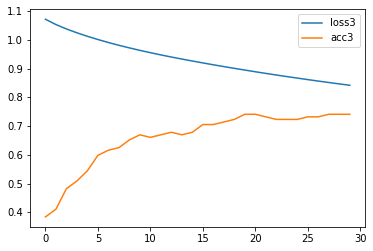

In [ ]:
import matplotlib.pyplot as plt

hist_loss3 = history3.history["loss"]
hist_acc3 = history3.history["accuracy"]

plt.plot(np.arange(len(hist_loss3)), hist_loss3, label="loss3")
plt.plot(np.arange(len(hist_acc3)), hist_acc3, label="acc3")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model3.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 0.2212 - accuracy: 0.8947
0.22119140625 0.8947368264198303


# test4

In [4]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [6]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

t = np_utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model4 = Sequential()
model4.add(Dense(32, input_dim=4))
model4.add(Activation("relu"))
model4.add(Dense(32))
model4.add(Activation("relu"))
model4.add(Dense(3))
model4.add(Activation("softmax"))
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                160       
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

In [12]:
history4 = model4.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 7s 2ms/step - loss: 1.1531 - accuracy: 0.3076
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9581 - accuracy: 0.4258
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8186 - accuracy: 0.6854
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.7965
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.8601
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.8759
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8819
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.8364
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.8002
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8830
Epoch 11/30
14/14 [

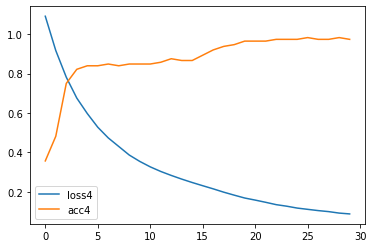

In [15]:
import matplotlib.pyplot as plt

hist_loss4 = history4.history["loss"]
hist_acc4 = history4.history["accuracy"]

plt.plot(np.arange(len(hist_loss4)), hist_loss4, label="loss4")
plt.plot(np.arange(len(hist_acc4)), hist_acc4, label="acc4")
plt.legend()
plt.show()

In [16]:
loss, accuracy = model4.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 0.2548 - accuracy: 0.8947
0.2547649145126343 0.8947368264198303
